In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/raw_osteoporosis_data.csv')

In [3]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [5]:
df.rename(columns={'Id': 'id', 'Age': 'age', 'Gender': 'gender', 'Hormonal Changes': 'hormonal_changes', 'Family History': 'family_history', 'Race/Ethnicity': 'race_Ethnicity', 'Body Weight': 'body_Weight', 'Calcium Intake': 'calcium_Intake', 'Vitamin D Intake': 'vitamin_D_Intake', 'Physical Activity': 'physical_Activity', 'Smoking': 'smoking', 'Alcohol Consumption': 'alcohol_Consumption', 'Medical Conditions': 'medical_Conditions', 'Medications': 'medications', 'Prior Fractures': 'prior_Fractures', 'Osteoporosis': 'osteoporosis'}, inplace=True)


In [6]:
df.head()

,id,age,gender,hormonal_changes,family_history,race_Ethnicity,body_Weight,calcium_Intake,vitamin_D_Intake,physical_Activity,smoking,alcohol_Consumption,medical_Conditions,medications,prior_Fractures,osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [7]:
df.isnull().sum()

id                       0
age                      0
gender                   0
hormonal_changes         0
family_history           0
race_Ethnicity           0
body_Weight              0
calcium_Intake           0
vitamin_D_Intake         0
physical_Activity        0
smoking                  0
alcohol_Consumption    988
medical_Conditions     647
medications            985
prior_Fractures          0
osteoporosis             0
dtype: int64

In [8]:
# df['alcohol_Consumption'].fillna('None', inplace=True)
# df['medical_Conditions'].fillna('None', inplace=True)
# df['medications'].fillna('None', inplace=True)

In [9]:
df['alcohol_Consumption'] = df['alcohol_Consumption'].fillna('None')
df['medical_Conditions'] = df['medical_Conditions'].fillna('None')
df['medications'] = df['medications'].fillna('None')

In [10]:
df.drop(['id'], axis=1, inplace=True)

In [11]:
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())
    print("\n")

gender
Male      992
Female    966
Name: count, dtype: int64


hormonal_changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64


family_history
No     998
Yes    960
Name: count, dtype: int64


race_Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64


body_Weight
Normal         1027
Underweight     931
Name: count, dtype: int64


calcium_Intake
Low         1004
Adequate     954
Name: count, dtype: int64


vitamin_D_Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64


physical_Activity
Active       1021
Sedentary     937
Name: count, dtype: int64


smoking
Yes    982
No     976
Name: count, dtype: int64


alcohol_Consumption
None        988
Moderate    970
Name: count, dtype: int64


medical_Conditions
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64


medications
None               985
Corticosteroids    973
Name: count, dt

In [12]:
df['medical_Conditions'].describe()

count                1958
unique                  3
top       Hyperthyroidism
freq                  678
Name: medical_Conditions, dtype: object

In [13]:
# sns.set(style = "whitegrid")
# plt.figure(figsize = (6, 4.5))

# sns.boxplot(
#     x = df['physical_Activity'],
#     color = "#9ECAE1",
#     linewidth = 2,
#     boxprops = dict(edgecolor = "black"),
#     whiskerprops = dict(color = "black"),
#     capprops = dict(color = "black"),
#     medianprops = dict(color = "black"),
#     flierprops = dict(markerfacecolor = 'black', marker = 'o')
# )
# plt.title('Distribution of physical_Activity', fontsize = 12, weight = 'bold')
# plt.xlabel('physical_Activity', fontsize = 10)

# plt.show()

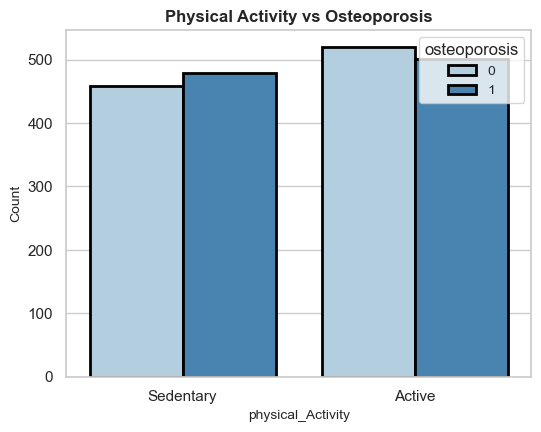

In [14]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))



sns.countplot(data = df, x = 'physical_Activity', hue = 'osteoporosis', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.title('Physical Activity vs Osteoporosis', fontsize = 12, weight = 'bold')
plt.xlabel('physical_Activity', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'osteoporosis', fontsize = 10)

plt.show()

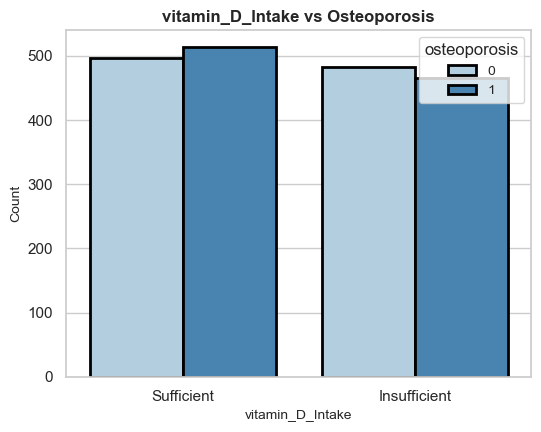

In [15]:

sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))



sns.countplot(data = df, x = 'vitamin_D_Intake', hue = 'osteoporosis', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.title('vitamin_D_Intake vs Osteoporosis', fontsize = 12, weight = 'bold')
plt.xlabel('vitamin_D_Intake', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'osteoporosis', fontsize = 10)

plt.show()

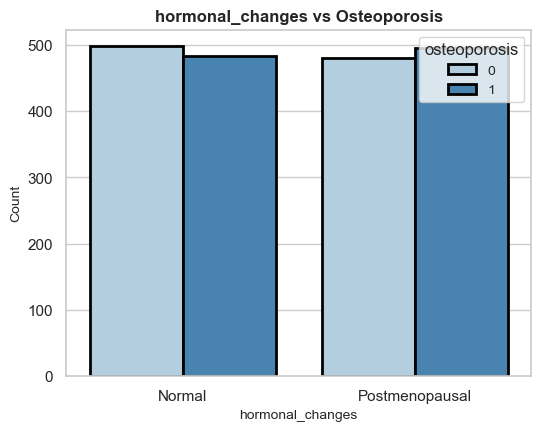

In [16]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))



sns.countplot(data = df, x = 'hormonal_changes', hue = 'osteoporosis', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.title('hormonal_changes vs Osteoporosis', fontsize = 12, weight = 'bold')
plt.xlabel('hormonal_changes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'osteoporosis', fontsize = 10)

plt.show()

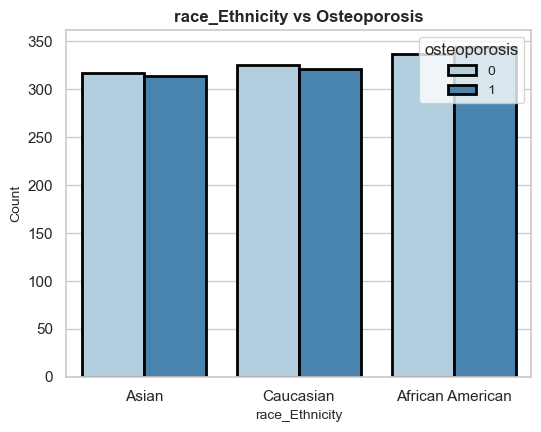

In [17]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))



sns.countplot(data = df, x = 'race_Ethnicity', hue = 'osteoporosis', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.title('race_Ethnicity vs Osteoporosis', fontsize = 12, weight = 'bold')
plt.xlabel('race_Ethnicity', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'osteoporosis', fontsize = 10)

plt.show()

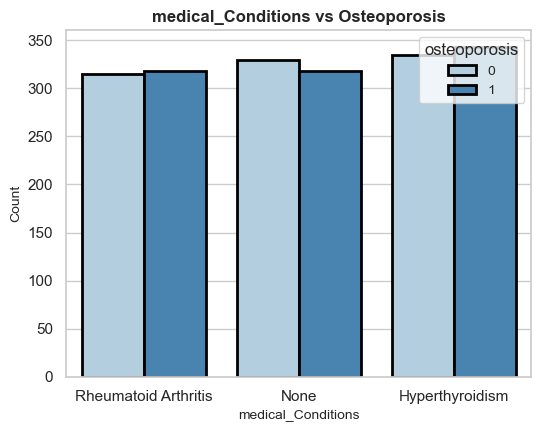

In [18]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))



sns.countplot(data = df, x = 'medical_Conditions', hue = 'osteoporosis', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.title('medical_Conditions vs Osteoporosis', fontsize = 12, weight = 'bold')
plt.xlabel('medical_Conditions', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'osteoporosis', fontsize = 10)

plt.show()

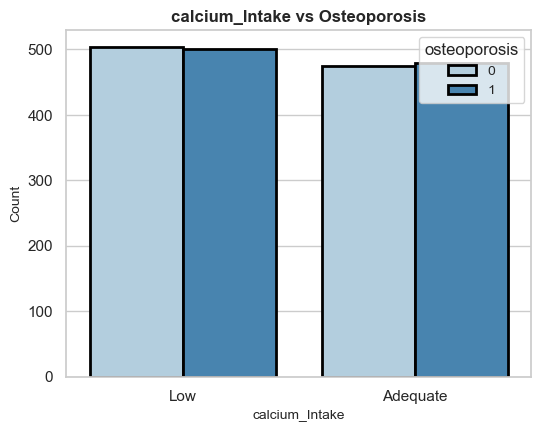

In [19]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.countplot(data = df, x = 'calcium_Intake', hue = 'osteoporosis', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.title('calcium_Intake vs Osteoporosis', fontsize = 12, weight = 'bold')
plt.xlabel('calcium_Intake', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'osteoporosis', fontsize = 10)

plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df['age'] = standard_scaler.fit_transform(df[['age']])

In [21]:
from sklearn.preprocessing import LabelEncoder

columns_for_label_encoding = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in columns_for_label_encoding:
    df[column] = label_encoder.fit_transform(df[column])
    print(column, "encoded values:", df[column].unique())

gender encoded values: [0 1]
hormonal_changes encoded values: [0 1]
family_history encoded values: [1 0]
race_Ethnicity encoded values: [1 2 0]
body_Weight encoded values: [1 0]
calcium_Intake encoded values: [1 0]
vitamin_D_Intake encoded values: [1 0]
physical_Activity encoded values: [1 0]
smoking encoded values: [1 0]
alcohol_Consumption encoded values: [0 1]
medical_Conditions encoded values: [2 1 0]
medications encoded values: [0 1]
prior_Fractures encoded values: [1 0]


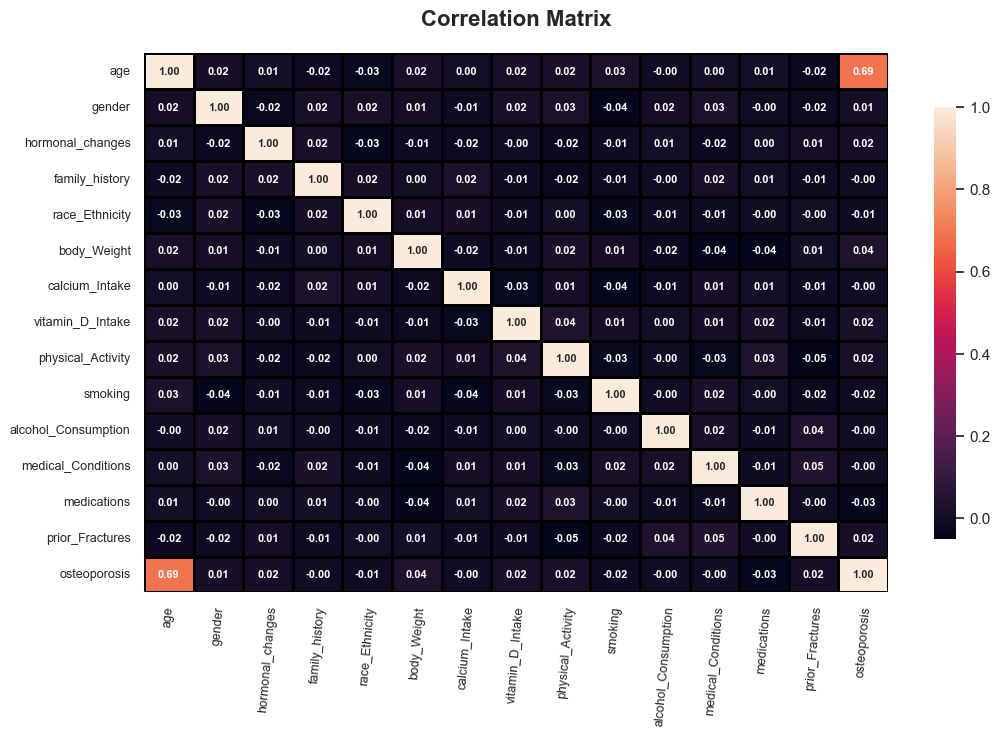

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize = (12,7))

heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cbar_kws = {"shrink": .8}, linewidths = 1.0, linecolor = 'black', 
                     annot_kws = {"size": 8, "weight": "bold"}, cbar = True)

plt.title('Correlation Matrix', fontsize = 16, weight = 'bold', pad = 20)
plt.xticks(fontsize = 9, rotation = 85)
plt.yticks(fontsize = 9)

plt.show()

In [23]:
df.to_csv("../data/cleaned_osteporosis_data_VietThy.csv", index=False)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('osteoporosis', axis = 1), df['osteoporosis'], test_size = 0.25, random_state = 2025)

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

#create a support vector machine model
support_vector_machine_model = SVC(random_state = 2025)

#train model on training data
support_vector_machine_model.fit(X_train, y_train)

#make prodictions from patters
y_pred = support_vector_machine_model.predict(X_test)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

joblib.dump(support_vector_machine_model, '../frontend/support_vector_machine_model.pkl')

Accuracy: 0.8204081632653061


['../frontend/support_vector_machine_model.pkl']